In [3]:
import matplotlib.pyplot as plt
import numpy as np


def CreateSeries(File,FreqRef):

    with open(File) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    V = [x.strip().split("\t")[1] for x in content] 
    V = np.array(V).astype(np.int)
    t = [x.strip().split("\t")[0] for x in content]
    t = np.array(t).astype(np.float)/FreqRef
    MaxT = t[-1]*FreqRef

    return t,V,MaxT

#ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC1_pins = [21,22,19,15,13,11,12,10, 8]
ADC2_pins = [38,37,36,35,33,32,26,24,23]

#ADC1_GPIO = [9, 25,10,22,27,17,18,15,14]
ADC1_GPIO =  [9 ,25,10,22,27,17,18,15,14]

ADC2_GPIO = [20,26,16,19,13,12, 7, 8,11]

ADC1len = len(ADC1_GPIO)
ADC2len = len(ADC2_GPIO)


def GetV1(Volts):
    Signal = []
    Map = np.zeros((len(V),32), dtype=np.int)
    for i in range(len(Volts)):
        val = V[i]
        SignalZero = 0
        for k in range(32):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC1len):
            if ( (k == 6) or (k == 5) or (k == 4) ):
                SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
            else:
                SignalZero += 2**k*((val & 2**ADC1_GPIO[k])/2**ADC1_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map

def GetV2(Volts):
    Signal = []
    Map = np.zeros((len(V),32), dtype=np.int)
    for i in range(len(Volts)):
        val = V[i]
        SignalZero = 0
        for k in range(32):
            Map[i][k] = (val & 2**k)/2**k
        for k in range(ADC2len):
                SignalZero += 2**k*((val & 2**ADC2_GPIO[k])/2**ADC2_GPIO[k])
        Signal.append(SignalZero)

            
    return Signal,Map

823906.0


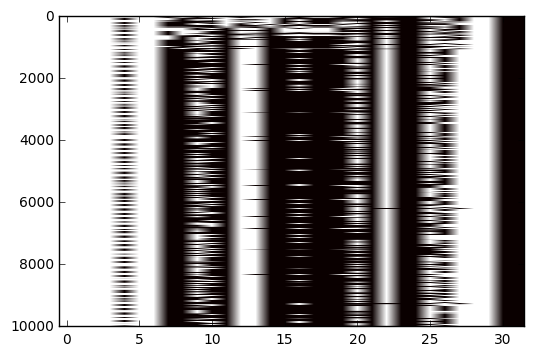

In [10]:
t,V,MaxT = CreateSeries("ThirdAcq.data",10000000)
Map = GetV2(V)[1]

print MaxT
im = plt.imshow(Map, cmap='hot', aspect="auto")
#plt.colorbar(im, orientation='horizontal')
plt.show()

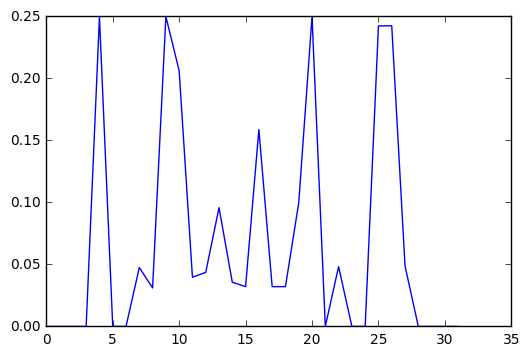

In [11]:
plt.plot(np.var(Map,0))
plt.show() 

In [12]:
for m in range(32):
    if (np.var(Map,0)[m]):
        print str(m)+" - "+str(np.var(Map,0)[m])

4 - 0.249639
7 - 0.0475
8 - 0.03106959
9 - 0.24999936
10 - 0.20615164
11 - 0.03968604
12 - 0.04361151
13 - 0.09578671
14 - 0.035631
15 - 0.03209776
16 - 0.158796
17 - 0.03209776
18 - 0.03209776
19 - 0.09968871
20 - 0.24996031
22 - 0.04821936
25 - 0.24232624
26 - 0.24248311
27 - 0.04884775


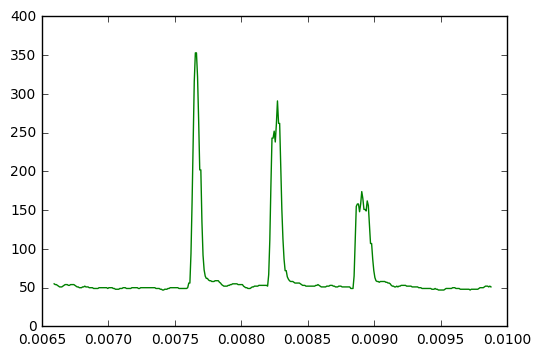

In [15]:
M2 = GetV2(V)[0]
Map = GetV1(V)[1]
M1 = GetV1(V)[0]
#plt.plot(t[800:1200],M1[800:1200],"r")
plt.plot(t[800:1200],M2[800:1200],"g")
plt.show()

### Seems like the pins 11 and 12 have overlaps

Due to a soldering mistake

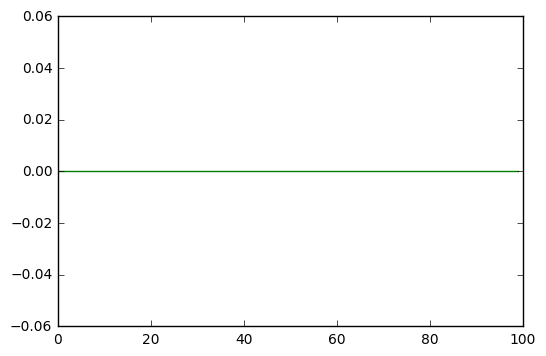

In [16]:
plt.plot( abs((Map[:,17][0:100]) - (Map[:,18][0:100])),"g" )

plt.show()